<a href="https://colab.research.google.com/github/YeonKang/Python-for-Machine-Learning/blob/main/Lec3_2_Linear_Regression_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

**Load dataset**

In the following data

*   X = number of claims
*   Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

dataset from - http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html (Auto Insurance in Sweden)

In [1]:
from google.colab import files
myfile = files.upload()

Saving slr06.xls to slr06.xls


In [7]:
df = pd.read_excel(io.BytesIO(myfile['slr06.xls']))
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [8]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

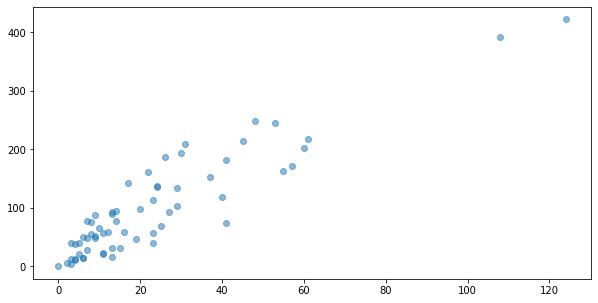

In [9]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)